In [198]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [199]:
dataset_path = "../assets/processed_dataset.csv"
df = pd.read_csv(dataset_path, encoding='utf-8', delimiter=",")
df.head(3)

,platform,account_id,id,created_time,text_original,text_additional,likes_count,shares_count,comments_count,views_count
0,Instagram,59141296785,C_00PPctR-o,2024-09-12 17:20:36.000000 +00:00,NaN,NaN,222.0,NaN,34.0,NaN
1,Instagram,60554087008,C_00W8KttVv,2024-09-12 17:21:27.000000 +00:00,"C’è un gruppo sulla parola di Dio sulla mia homepage personale\n👉 (@lamore_della_vergine_maria )\n👆ᴛᴏᴄᴄᴀ ɪʟ ʟɪɴᴋ ᴅɪ ᴡʜᴀᴛꜱᴀᴘᴘ per iscriverti gratuitamente, sta per arrivare una buona notizia che può cambiare il tuo destino e quello della tua famiglia.\nOggi noi esseri umani affrontiamo varie difficoltà e sofferenze, tutte causate dalla corruzione di Satana. Dio conosce il nostro dolore e vuole salvarci dalla nostra sofferenza Stasera abbiamo un meraviglioso catechismo online per aiutarti a scoprire il mistero di come il Signore Gesù ritorna per salvarci. Accogli la venuta del Signore e ricevi la salvezza di Dio, e il tuo dolore finirà, le tue lacrime si asciugheranno e tutte le porte saranno aperte.\n#SanPietro\n#Chiesa\n#SantaGiulia\n#SantoSpirito\n#SanGiuseppe\n#SanBiagio\n#SantaMariadegliAngeli\n#SanLeonardo\n#AbbaziaDiPiona\n#AbbaziadiCasamari\n#BasilicadelSacroCuore\n#gesù\n#preghiera\n#chiesacattolica\n#papafrancesco",NaN,391.0,NaN,37.0,NaN
2,Instagram,62605500679,C_026U_t3We,2024-09-12 17:43:38.000000 +00:00,"𝐒𝐮𝐥 𝐦𝐢𝐨 𝐩𝐫𝐨𝐟𝐢𝐥𝐨 𝐜‘𝐞̀ 𝐮𝐧 𝐠𝐫𝐮𝐩𝐩𝐨 𝐝𝐢 𝐬𝐭𝐮𝐝𝐢𝐨 𝐬𝐮𝐥𝐥𝐚 𝐩𝐚𝐫𝐨𝐥𝐚 𝐝𝐢 𝐃𝐢𝐨. 𝐓𝐨𝐜𝐜𝐚 𝐢𝐥 𝐥𝐢𝐧𝐤 𝐝𝐢 𝐖𝐡𝐚𝐭𝐬𝐀𝐩𝐩 𝐩𝐞𝐫 𝐩𝐚𝐫𝐭𝐞𝐜𝐢𝐩𝐚𝐫𝐞, 𝐞 𝐫𝐢𝐜𝐞𝐯𝐞𝐫𝐚𝐢 𝐮𝐧𝐚 𝐛𝐮𝐨𝐧𝐚 𝐧𝐨𝐭𝐢𝐳𝐢𝐚 𝐜𝐡𝐞 𝐜𝐚𝐦𝐛𝐢𝐞𝐫𝐚̀ 𝐢𝐥 𝐝𝐞𝐬𝐭𝐢𝐧𝐨 𝐭𝐮𝐨 𝐞 𝐝𝐞𝐥𝐥𝐚 𝐭𝐮𝐚 𝐟𝐚𝐦𝐢𝐠𝐥𝐢𝐚.\n#Gesùvive\n#gesùseilamiavita\n#DuomodiMilano\n#SanPietro\n#Chiesa\n#chiesacattolica\n#SanGiuseppe\n#Abbazia\n#SanZeno\n#SanMicheleArcangelo\n#SanMicheleArcangelo\n#AbbaziadiCasamari\n#BasilicaDiSanDomenico\n#gesù\n#preghiera\n#chiesacattolica\n#papafrancesco",NaN,9.0,NaN,3.0,NaN


In [200]:
print(df[["platform"]].value_counts())

platform 
Facebook     2500
Instagram    2500
TikTok       2500
YouTube      2500
Name: count, dtype: int64


1. what is additional text?

In [201]:
df[df["text_additional"].notna()].head()

,platform,account_id,id,created_time,text_original,text_additional,likes_count,shares_count,comments_count,views_count
5925,Facebook,100092726436702,360869557013923,2024-04-29 14:10:28.000000 +00:00,NaN,Instagram,42.0,0.0,30.0,NaN
7435,Facebook,100093660676608,293919733740047,2024-03-24 13:22:57.000000 +00:00,NaN,Instagram,664.0,17.0,761.0,NaN
7497,Facebook,100090334794493,360686530285837,2024-03-25 06:57:18.000000 +00:00,NaN,Instagram,699.0,46.0,737.0,NaN


different id's, created times, I don't see something that would indicate why parser or whatever failed to extract valid data.

same check for text_original:

In [202]:
df[df["text_original"].isin(['Instagram', 'TikTok', 'Facebook', 'YouTube'])].head()

,platform,account_id,id,created_time,text_original,text_additional,likes_count,shares_count,comments_count,views_count


i think i can drop "text_additional" column and that 3 strange rows

In [203]:
# getting rid of that 3 rows with social media names instead of 
# text info also assuming that they might be invalid in general because of strange details 
df = df[df["text_additional"].isna()]
# drop column full of nan
df = df.drop(columns=["text_additional"])

In [204]:
print(df[["platform"]].value_counts())

platform 
Instagram    2500
TikTok       2500
YouTube      2500
Facebook     2497
Name: count, dtype: int64


sample from created_time column

In [205]:
print(len("2024-09-12 17:20:36.000000 +00:00"))

33


simple check for percistency before conversion

In [206]:
df[df["created_time"].apply(lambda x: len(x) < 33)].head()

,platform,account_id,id,created_time,text_original,likes_count,shares_count,comments_count,views_count


In [207]:
df[df["created_time"].apply(lambda x: len(x) > 33)].head()

,platform,account_id,id,created_time,text_original,likes_count,shares_count,comments_count,views_count
757,Instagram,58769017625,C8Q6uJxCPSg,"2024-06-16 05:10:05.000000 +00:00""",NaN,1568.0,NaN,334.0,NaN


delete qoute

In [208]:
df.at[757, "created_time"] = "2024-06-16 05:10:05.000000 +00:00"

In [209]:
df[df["created_time"].apply(lambda x: len(x) > 33)].head()

,platform,account_id,id,created_time,text_original,likes_count,shares_count,comments_count,views_count


In [210]:
print("NaN counts in each column:")
print(df.isna().sum())

NaN counts in each column:
platform             0
account_id           0
id                   0
created_time         0
text_original     2384
likes_count          2
shares_count      5000
comments_count      45
views_count       4376
dtype: int64


In [211]:
print(df.dtypes)

platform           object
account_id         object
id                 object
created_time       object
text_original      object
likes_count       float64
shares_count      float64
comments_count    float64
views_count       float64
dtype: object


In [212]:
df['created_time'] = pd.to_datetime(df['created_time'], utc=True)
df['hour'] = df['created_time'].dt.hour
df['date'] = df['created_time'].dt.date
df['day_of_week'] = df['created_time'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=days_order, ordered=True)

df["platform"] = df["platform"].astype("category")


i call df below dummy just to show that each account id is for separate platform

In [213]:
def get_by_account_id(df):
    return df.groupby(by="account_id", as_index=False).agg(
    size=("account_id", "size"),
    platform=("platform", set),
    id=("id", list),
    created_time=("created_time", list),
    text_original=("text_original", list),
    likes_count=("likes_count", list),
    shares_count=("shares_count", list),
    comments_count=("comments_count", list),
    views_count=("views_count", list)
).sort_values(by="size")

In [214]:
dummy_dupl_account = get_by_account_id(df)
print(len(dummy_dupl_account))
dummy_dupl_account.head()

101


,account_id,size,platform,id,created_time,text_original,likes_count,shares_count,comments_count,views_count
10,100089465236396,1,{Facebook},[391707333821438],[2024-03-21 19:43:18+00:00],[nan],[179.0],[5.0],[150.0],[nan]
85,UCaUPqufKXhrf1WH-ab413Rg,1,{YouTube},[cgbGX_IPtGU],[2024-04-13 07:00:19+00:00],"[13 avril 2024 Comment ne pas te louer ? 🟦⬜🟥 🇫🇷✝️🇧🇪\nSi vous appréciez les poèmes, les prières et les audios bibliques sur ma chaîne, ou si vous souhaitez recevoir quotidiennement mes publications audio, je vous invite chaleureusement à rejoindre notre groupe WhatsApp. Dans ce groupe, vous recevrez gratuitement ces ressources spirituelles. \nDe plus, nous proposons une conférence d'étude biblique de base de 7 jours. Quelles que soient vos questions, vous pouvez trouver la solution ici !\n👉https://chat.whatsapp.com/FwSNKG4xCL01xIphEpiGM5 \n📞https://wa.me/33766609892]",[613.0],[nan],[363.0],[6362.0]
40,61552271822243,1,{Facebook},[122148161840075727],[2024-03-06 19:51:20+00:00],[#Dio #signore #cristo #fede #croce #santo #preghiera #vita #domanda #telefono #domani #mano],[24.0],[5.0],[18.0],[117.0]
79,UCO6AIGEiIB6bfMN84mSVEEQ,1,{YouTube},[mXJHRRDPBCo],[2024-10-03 22:07:00+00:00],[🔔分享聖經 | 撒但最想摧毀的3種基督徒，如果你是其中之一，你很幸運！不被攻擊的就不是真正的基督徒！##分享聖經 #撒但的攻擊 #真正的基督徒 #中国人在加拿大 #中国人在英国 🔔分享聖經 | 撒但最想摧毀的3種基督徒，如果你是其中之一，你很幸運！不被攻擊的就不是真正的基督徒！\n當你遇到撒但試探攻擊時，那你身上一定有讓撒但忌憚的表現，你存在這些表現嗎？\n1、被上帝看重的人\n教會中並非所有人都臨到撒但的攻擊試探，你越被上帝看重，撒但越不想讓上帝得着你，它不甘心你不敬拜它而歸向神，成為得勝者對它產生分辨，它內心嫉恨這樣的人，就常常試探、攪擾你，讓你軟弱，遠離神。聖經中約伯被神稱為敬畏神遠離惡的人，撒但不服氣，就幾次三番試探約伯，妄想讓約伯埋怨神歸向它。從這個事實看到，被撒但攻擊試探的人，往往是被神看重的人，當你臨到撒但的試探時，不要害怕，說明上帝希望在你身上看到見證，讓撒但蒙羞。\n\n2、時常來到上帝面前的人\n在生活中常常來到神面前、做事常常依靠神的人，撒但就會在人身邊製造麻煩困難，像經濟、家庭、工作等問題，試探引誘人，讓人對上帝失去信心、與上帝遠離，不再得勝撒但，被撒但牢牢掌控。聖經中說：「務要謹守，儆醒。因為你們的仇敵魔鬼，如同吼叫的獅子，遍地遊行，尋找可吞吃的人。你們要用堅固的信心抵擋他，因為知道你們在世上的眾弟兄也是經歷這樣的苦難。」（彼得前書5:8-9）這節經文警告我們，在撒但試探引誘時，更要以對神的信心來打敗撒但。同時這讓我們更加確定我們時常來到神面前，撒但就會攪擾我們，這也是撒但會想法設法摧毀的人。\n\n3、上帝即將成全的人\n聖經中說：「忍受試探的人是有福的，因為他經過試驗以後，必得生命的冠冕；這是主應許給那些愛他之人的。」（雅各書1:12）上帝在末世將成全得勝者，撒但絕不甘心，在人即將被作成得勝者之前，撒但會瘋狂試探攻擊，且要比平常的試探來得更加猛烈，撒但會做垂死掙扎。這個時刻屬靈的爭戰非常激烈，但也是你得到上帝成全的好機會，撒但不會放過任何機會破壞人進入神的國。一定要小心不能鬆懈，禱告神得勝撒但，必定有上帝的應許臨到你。\n\n試探臨到你，是上帝與撒但有一個關於你的賭約，你知道上帝希望看到你怎麽做嗎？請在評論區留言，説出自己的想法，並點贊關注我們，更多有關於聖經的奧秘將持續更新！\n\nhttps://www.youtube.com/@user-shengjing/featured?sub_confirmation=1\n\n歡迎來到《分享聖經》！我們分享聖經的智慧和啟示，探討如何將其應用到日常生活中。無論你是基督徒還是對聖經感興趣的朋友，我們都歡迎你的加入！免費訂閱（並請按一下鈴鐺🔔，如此，只要有新影片便會主動寄給您）\n\n如果你在信仰中有問題，請點擊WhatsApp鏈接與我們聯繫。\nWhatsApp: https://chat.whatsapp.com/BrMJjE0f6vu59nShoJyghz\n\n無論你身在何處，願上帝保佑你，無論你去往何處，願上帝指引你。無論你做出什麼決定，願上帝光照你生命中的每一天。\n\n#基督教 #聖經 #聖經金句 #耶穌 #十字架 #福音 #信仰 #基督徒 #耶和華 #每日靈修 #禱告 #語錄 #聖經 #台灣 #馬來西亞 #信仰 #上帝的愛 #分享聖經 #聖經故事 #聖經簡報站腓立比書 #台灣 #馬來西亞 #香港教會 #新加坡教會 #馬來西亞教會 #在美国的中国人 #加拿大华人 #新加坡基督生命堂 #台灣長老教會 #基督徒的見證 #基督徒歌曲 #基督徒離婚 #祷告的力量 #主耶稣最懂我 #敬拜詩歌 #中國人在海外 #海外華人 #聖經故事 #中国人在加拿大 #中国人在英国],[60.0],[nan],[5.0],[868.0]
90,UCkykjelGxSsQN2pML9T3rQA,1,{YouTube},[NK7UGoZkWyk],[2024-07-30 13:00:31+00:00],[LEGGILA IN SILENZIO],[420.0],[nan],[103.0],[2967.0]


In [215]:
dummy_dupl_account[dummy_dupl_account["platform"].apply(lambda x: len(x) > 1)].head()

,account_id,size,platform,id,created_time,text_original,likes_count,shares_count,comments_count,views_count


In [216]:
del dummy_dupl_account
tt_df = df[df["platform"] == "TikTok"]
print("NaN counts in each column:")
print(tt_df.isna().sum())

NaN counts in each column:
platform            0
account_id          0
id                  0
created_time        0
text_original     310
likes_count         0
shares_count        0
comments_count      0
views_count         0
hour                0
date                0
day_of_week         0
dtype: int64


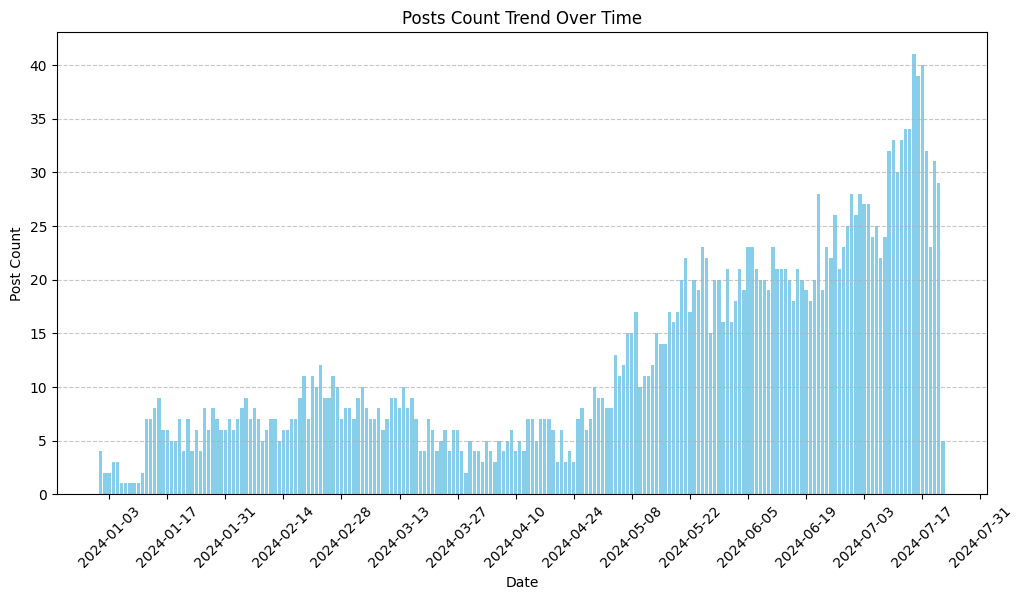

In [217]:
import matplotlib.dates as mdates
tt_date_distr = tt_df.groupby(by="date", as_index=False).agg(post_count=("date", "size"))
tt_date_distr["date"] = pd.to_datetime(tt_date_distr["date"])
plt.figure(figsize=(12, 6))
plt.bar(tt_date_distr["date"], tt_date_distr["post_count"], color="skyblue")

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=14))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

plt.title('Posts Count Trend Over Time')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Post Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [218]:
print(tt_df.dtypes)

platform                     category
account_id                     object
id                             object
created_time      datetime64[ns, UTC]
text_original                  object
likes_count                   float64
shares_count                  float64
comments_count                float64
views_count                   float64
hour                            int32
date                           object
day_of_week                  category
dtype: object


In [ ]:
tt_df["weighted_engagement"] = (
    tt_df["likes_count"] * 1 +
    tt_df["comments_count"] * 2 +
    tt_df["shares_count"] * 3 +
    tt_df["views_count"] * 0.2
)

tt_df["engagement_to_views_ratio"] =  (
    tt_df["likes_count"] +
    tt_df["comments_count"] +
    tt_df["shares_count"]) / tt_df["views_count"]
# metric for 'community' building (seems to suit for religious posts)
tt_df["community_to_views_ratio"] = (
    tt_df["comments_count"] +
    tt_df["shares_count"]) / tt_df["views_count"]


source for emoji related code below: https://www.kaggle.com/code/eliasdabbas/how-to-create-a-python-regex-to-extract-emoji/notebook 

In [220]:
import unicodedata
import re
import advertools as adv
from collections import namedtuple, Counter

with open('../assets/emoji_raw.txt', 'rt') as file:
    emoji_raw = file.read()

EmojiEntry = namedtuple('EmojiEntry', ['codepoint', 'status', 'emoji', 'name', 'group', 'sub_group'])

E_regex = re.compile(r' ?E\d+\.\d+ ') # remove the pattern E<digit(s)>.<digit(s)>
emoji_entries = []

for line in emoji_raw.splitlines()[32:]:  # skip the explanation lines
    if line == '# Status Counts':  # the last line in the document
        break
    if 'subtotal:' in line:  # these are lines showing statistics about each group, not needed
        continue
    if not line:  # if it's a blank line
        continue
    if line.startswith('#'):  # these lines contain group and/or sub-group names
        if '# group:' in line:
            group = line.split(':')[-1].strip()
        if '# subgroup:' in line:
            subgroup = line.split(':')[-1].strip()
    if group == 'Component':  # skin tones, and hair types, skip, as mentioned above
        continue
    if re.search('^[0-9A-F]{3,}', line):  # if the line starts with a hexadecimal number (an emoji code point)
        # here we define all the elements that will go into emoji entries
        codepoint = line.split(';')[0].strip()  # in some cases it is one and in others multiple code points
        status = line.split(';')[-1].split()[0].strip() # status: fully-qualified, minimally-qualified, unqualified
        if line[-1] == '#':
            # The special case where the emoji is actually the hash sign "#". In this case manually assign the emoji
            if 'fully-qualified' in line:
                emoji = '#️⃣'
            else:
                emoji = '#⃣'  # they look the same, but are actually different 
        else:  # the default case
            emoji = line.split('#')[-1].split()[0].strip()  # the emoji character itself
        if line[-1] == '#':  # (the special case)
            name = '#'
        else:  # extract the emoji name
            split_hash = line.split('#')[1]
            rm_capital_E = E_regex.split(split_hash)[1]
            name = rm_capital_E
        templine = EmojiEntry(codepoint=codepoint,
                              status=status,
                              emoji=emoji,
                              name=name,
                              group=group,
                              sub_group=subgroup)
        emoji_entries.append(templine)


In [221]:
emoji_dict = {x.emoji: x for x in emoji_entries}

multi_codepoint_emoji = []

for code in [c.codepoint.split() for c in emoji_entries]:
    if len(code) > 1:
        # turn to a hexadecimal number zfilled to 8 zeros e.g: '\U0001F44D'
        hexified_codes = [r'\U' + x.zfill(8) for x in code]  
        hexified_codes = ''.join(hexified_codes)  # join all hexadecimal components 
        multi_codepoint_emoji.append(hexified_codes)

# sorting by length in decreasing order is extremely important as demonstrated above
multi_codepoint_emoji_sorted = sorted(multi_codepoint_emoji, key=len, reverse=True)

# join with a "|" to function as an "or" in the regex
multi_codepoint_emoji_joined = '|'.join(multi_codepoint_emoji_sorted)  

In [222]:
single_codepoint_emoji = []

for code in [c.codepoint.split() for c in emoji_entries]:
    if len(code) == 1:
        single_codepoint_emoji.append(code[0])

In [223]:
def get_ranges(nums):
    """Reduce a list of integers to tuples of local maximums and minimums.

    :param nums: List of integers.
    :return ranges: List of tuples showing local minimums and maximums
    """
    nums = sorted(nums)
    lows = [nums[0]]
    highs = []
    if nums[1] - nums[0] > 1:
        highs.append(nums[0])
    for i in range(1, len(nums)-1):
        if (nums[i] - nums[i-1]) > 1:
            lows.append(nums[i])
        if (nums[i + 1] - nums[i]) > 1:
            highs.append(nums[i])
    highs.append(nums[-1])
    if len(highs) > len(lows):
        lows.append(highs[-1])
    return [(l, h) for l, h in zip(lows, highs)]

In [224]:
# We first convert single_codepoint_emoji to integers to make calculations easier
single_codepoint_emoji_int = [int(x, base=16) for x in single_codepoint_emoji]
single_codepoint_emoji_ranges = get_ranges(single_codepoint_emoji_int)

In [225]:
single_codepoint_emoji_raw = r''  # start with an empty raw string
for code in single_codepoint_emoji_ranges:
    if code[0] == code[1]:  # in this case make it a single hexadecimal character
        temp_regex =  r'\U' + hex(code[0])[2:].zfill(8)
        single_codepoint_emoji_raw += temp_regex
    else:
        # otherwise create a character range, joined by '-'
        temp_regex = '-'.join([r'\U' + hex(code[0])[2:].zfill(8), r'\U' + hex(code[1])[2:].zfill(8)])
        single_codepoint_emoji_raw += temp_regex

In [226]:
with_text_tt_df = tt_df[tt_df["text_original"].notna()]
without_text_tt_df = tt_df[tt_df["text_original"].isna()]
print(len(with_text_tt_df))
print(len(without_text_tt_df))

2190
310


In [227]:
dummy_text_tt_df = with_text_tt_df[with_text_tt_df["text_original"].apply(lambda x: len(x) <= 3)]
print(len(dummy_text_tt_df))
dummy_text_tt_df.head()

2


,platform,account_id,id,created_time,text_original,likes_count,shares_count,comments_count,views_count,hour,date,day_of_week,weighted_engagement,engagement_to_views_ratio,community_to_views_ratio
3351,TikTok,7301606688049054752,7367080006511496480,2024-05-09 19:13:04+00:00,#,256.0,1.0,12.0,1986.0,19,2024-05-09,Thursday,680.2,0.135448,0.006546
3805,TikTok,7373402237239870496,7376948458118303008,2024-06-05 09:27:47+00:00,#,145.0,0.0,52.0,2439.0,9,2024-06-05,Wednesday,736.8,0.080771,0.021320


In [228]:
dummy_text_tt_df = ["#"]
dummy_text_rows = with_text_tt_df[
    with_text_tt_df["text_original"].isin(dummy_text_tt_df)]
without_text_tt_df = pd.concat(
    [without_text_tt_df, dummy_text_rows], ignore_index=True)

with_text_tt_df = with_text_tt_df[
    ~with_text_tt_df["text_original"].isin(dummy_text_tt_df)
]

In [229]:
all_emoji_regex = re.compile(multi_codepoint_emoji_joined + '|' +  r'[' + single_codepoint_emoji_raw + r']')

URL_REGEX = re.compile(r'https?://\S+|www\.\S+')
EMAIL_REGEX = re.compile(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}')
PHONE_REGEX = re.compile(r'\b(?:\+?\d{1,3})?[-. \(\)]*\d{1,4}[-. \(\)]*\d{1,4}[-. \(\)]*\d{1,9}\b')
TAG_REGEX = re.compile(r'[@#]\w+')
ACCOUNT_REGEX = re.compile(r'@\w+')

def extract_text_components_to_df(df, text_column='text_original'):
    """
    Adds new columns to the DataFrame by extracting links, emails, phone numbers,
    tags, mentions, and emojis from the specified text column.
    """
    df['links'] = df[text_column].apply(lambda x: URL_REGEX.findall(x))
    df['emails'] = df[text_column].apply(lambda x: EMAIL_REGEX.findall(x))
    df['phone_numbers'] = df[text_column].apply(lambda x: PHONE_REGEX.findall(x))
    df['tags'] = df[text_column].apply(lambda x: TAG_REGEX.findall(x))
    df['accounts'] = df[text_column].apply(lambda x: ACCOUNT_REGEX.findall(x))
    df['emojis'] = df[text_column].apply(lambda x: all_emoji_regex.findall(x))

    # Remove extracted components from text to get clean version for language detection
    def clean_text(text):
        cleaned_text = URL_REGEX.sub('', text)
        cleaned_text = EMAIL_REGEX.sub('', cleaned_text)
        cleaned_text = PHONE_REGEX.sub('', cleaned_text)
        cleaned_text = TAG_REGEX.sub('', cleaned_text)
        cleaned_text = all_emoji_regex.sub('', cleaned_text)
        cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
        return cleaned_text

    df['cleaned_text'] = df[text_column].apply(clean_text)
    df['text_original'] = df["text_original"].apply(lambda x: x.replace("\n", ""))
    return df


with_text_tt_df = extract_text_components_to_df(with_text_tt_df)


with_text_tt_df[['text_original', 'links', 'emails', 'phone_numbers',
    'tags', 'accounts', 'emojis', 'cleaned_text']].head()


,text_original,links,emails,phone_numbers,tags,accounts,emojis,cleaned_text
2500,#PoderDaOração #Fé #Acreditar #ImpactoPositivo #VibraçõesPositivas #Otimismo #Crença #Transformação #Esperança #ForçaInterior #Gratidão #Reflexão #ConexãoDivina #DeusNoControle #Confiança #Bênçãos #CaminhoDaPaz #CuraEspiritual #AmorEterno #vidaabundante,[],[],[],"[#PoderDaOração, #Fé, #Acreditar, #ImpactoPositivo, #VibraçõesPositivas, #Otimismo, #Crença, #Transformação, #Esperança, #ForçaInterior, #Gratidão, #Reflexão, #ConexãoDivina, #DeusNoControle, #Confiança, #Bênçãos, #CaminhoDaPaz, #CuraEspiritual, #AmorEterno, #vidaabundante]",[],[],
2501,#nossasenhoraaparecida #nossamãe #rainha #fé #oração #devoção #agradecimento #reelsinstagram #reelsviral,[],[],[],"[#nossasenhoraaparecida, #nossamãe, #rainha, #fé, #oração, #devoção, #agradecimento, #reelsinstagram, #reelsviral]",[],[],
2502,#porta #anjo #boasnoticias #agosto,[],[],[],"[#porta, #anjo, #boasnoticias, #agosto]",[],[],
2503,#NossaSenhora #RogaPorNós #Amém #Deus #Saúde #Paz #365dias,[],[],[],"[#NossaSenhora, #RogaPorNós, #Amém, #Deus, #Saúde, #Paz, #365dias]",[],[],
2504,🙏🙏🙏 #Deus #preocupacoes #Maria #Senhor #Jesus #vida #Amém #fatima #saúde #pazbrasil #brasil 🇧🇷🇧🇷,[],[],[],"[#Deus, #preocupacoes, #Maria, #Senhor, #Jesus, #vida, #Amém, #fatima, #saúde, #pazbrasil, #brasil]",[],"[🙏, 🙏, 🙏, 🇧🇷, 🇧🇷]",


In [230]:
from langdetect import detect_langs
pd.set_option('display.max_rows', 500)

def detect_language_with_probs(text, tags):
    try:
        joined_tags = " ".join(tags).replace("#", "")
        
        if len(text.strip()) < 4 and len(joined_tags.strip()) < 4:
            return "non-definable", "0.0"
        
        lang_probs = detect_langs(text + " " + joined_tags)
        
        return lang_probs[0].lang, lang_probs[0].prob
    
    except Exception as e:
        print(f"Error detecting language for text: {text}. Error: {e}")
        return 'unknown', '0.0'

with_text_tt_df[['language', 'language_prob']] = with_text_tt_df.apply(
    lambda x: pd.Series(detect_language_with_probs(x.cleaned_text, x.tags)),
    axis=1
)
print(with_text_tt_df['language'].unique())

['pt' 'sl' 'en' 'it' 'pl' 'sw' 'fr' 'es' 'de' 'cy' 'ca' 'ro' 'so' 'hr'
 'et' 'id' 'no' 'sk' 'lt' 'tl']


In [231]:
from collections import Counter

by_account_tt_df = with_text_tt_df.groupby(
    by="account_id", as_index=False).agg(
        post_count=('account_id', "size"),
        languages=('language', list),
        language_probs=('language_prob', list),
        created_time=('created_time', list),
        engagement_to_views_ratio=('engagement_to_views_ratio', list),
        weighted_engagement=('weighted_engagement', list),
        views_count=("views_count", list),
        text_original=("text_original", list),
        links=("links", list),
        emails=("emails", list),
        phone_numbers=("phone_numbers", list),
        tags=("tags", list),
        emojis=("emojis", list),
        cleaned_text=("cleaned_text", list)
    )

uncertain_lang_accounts = by_account_tt_df[
    by_account_tt_df["languages"].apply(lambda x: len(set(x)) > 1)]

print("Overall accounts", len(by_account_tt_df))
print("Uncertain lang accounts" ,len(uncertain_lang_accounts))

def dominant_language(lang_list):
    return Counter(lang_list).most_common(1)[0][0]

# Create a DataFrame to analyze language inconsistencies
rows_with_different_languages = []

for _, row in uncertain_lang_accounts.iterrows():
    dominant_lang = dominant_language(row["languages"])
    
    for idx, lang in enumerate(row["languages"]):
        if lang != dominant_lang:
            rows_with_different_languages.append({
                "account_id": row["account_id"],
                "created_time": row["created_time"][idx],
                "language": lang,
                "language_probs": row["language_probs"][idx],
                "dominant_language": dominant_lang,
                "text_original": row["text_original"][idx]
            })

# Convert the list to a DataFrame
diff_lang_df = pd.DataFrame(rows_with_different_languages)
pd.set_option('display.max_colwidth', None)
# Show head of inconsistent language rowsmadonna dilourdes

Overall accounts 21
Uncertain lang accounts 11


In [232]:
diff_lang_by_text_df = diff_lang_df.groupby(
    by="text_original", as_index=False).agg(
        created_time=("created_time", list),
        account_id=("account_id", list),
        dominant_language=("dominant_language", list),
        language_probs=("language_probs", list),
        language=("language", list),
        
    )
pd.set_option('display.max_colwidth', None)

print("Uncertain lang rows after grouping", len(diff_lang_by_text_df))

Uncertain lang rows after grouping 74


In [233]:
# diff_lang_by_text_df.head(78)

manual reviewing was easy, most posts have similar hashtags, looked up translations and - only two posts have definitely different language from dominating
(english when portugese is dominating for account), fix - below:

In [234]:
# it will be used in separate analysis for account that has this posts
en_text_pt_account_id = "7317060523728045062"


In [235]:
by_account_tt_df['dominant_language'] = by_account_tt_df['languages'].apply(dominant_language)

with_text_tt_df = with_text_tt_df.merge(
    by_account_tt_df[['account_id', 'dominant_language']],
    on='account_id',
    how='left'
)

# leave this two samples out
with_text_tt_df = with_text_tt_df[
    ~((with_text_tt_df["account_id"] == en_text_pt_account_id) &
    (with_text_tt_df["language"] == "en"))
]

with_text_tt_df.loc[
    with_text_tt_df['language'] != with_text_tt_df['dominant_language'], 'language'
] = with_text_tt_df['dominant_language']


with_text_tt_df.drop(columns=['dominant_language'], inplace=True)
with_text_tt_df.drop(columns=['language_prob'], inplace=True)

print("Final language column unique values:", with_text_tt_df['language'].unique())

Final language column unique values: ['pt' 'it' 'pl']


In [236]:
with_text_tt_df.groupby(by="language", as_index=False).agg(
    size=("language", "size"),
    accounts_ids=("account_id", set)
).head()

,language,size,accounts_ids
0,it,769,"{7328843375271167009, 7373402237239870496, 7301606688049054752, 7325852473468879905, 7300624739352462368, 7304673650114987041, 6793090586712720389, 7300339497852568609, 7306616797560898592, 7304639704442504193}"
1,pl,1327,"{7327430517305066529, 7306055620665820166, 7372621278249337889, 7305775548541256737, 7310612150594372641, 7305768185533236256, 7305129826343666720, 7381198827104076832, 7306849648332243969, 7308760731372291104}"
2,pt,90,{7317060523728045062}


In [237]:
pt_tt_df = with_text_tt_df[with_text_tt_df["language"] == "pt"]
it_tt_df = with_text_tt_df[with_text_tt_df["language"] == "it"]
pl_tt_df = with_text_tt_df[with_text_tt_df["language"] == "pl"]

In [238]:
def get_engagement_by_bins(
        df,
        bins=[0, 25, 50, 100, 150, 200, 250, 300, np.inf],
        labels=['0-25', '25-50', '50-100', '100-150',
                '150-200', '200-250', '250-300', '300+']):
    
    grouped_df = df.groupby('account_id').agg(
        post_count=('account_id', 'size'),
        created_time=('created_time', list),
        engagement_to_views_ratio=('engagement_to_views_ratio', list),
        weighted_engagement=('weighted_engagement', list),
        views_count=("views_count", list),
        community_to_views_ratio=("community_to_views_ratio", list)
    ).reset_index()

    # Binning accounts based on post_count
    grouped_df['post_count_bin'] = pd.cut(grouped_df['post_count'], bins=bins, labels=labels, right=False)

    # Calculating statistics for each bin
    bin_stats = grouped_df.groupby('post_count_bin').agg(
        accounts_count=('account_id', lambda x: len(np.unique(x))),
        overall_post_count=('post_count', lambda x: np.sum(x)),
        avg_median_weighted_engagement=('weighted_engagement', lambda x: np.mean([np.median(i) for i in x])),
        avg_90th_percentile_engagement_ratio=('engagement_to_views_ratio', lambda x: np.mean([np.percentile(i, 90) for i in x])),
        avg_90th_percentile_views_count=('views_count', lambda x: np.mean([np.percentile(i, 90) for i in x])),
        avg_90th_percentile_community_ratio=('community_to_views_ratio', lambda x: np.mean([np.percentile(i, 90) for i in x])),

    ).reset_index()

    # Finding bins with highest values
    highest_median_bin = bin_stats.loc[bin_stats['avg_median_weighted_engagement'].idxmax()]
    highest_percentile_bin = bin_stats.loc[bin_stats['avg_90th_percentile_engagement_ratio'].idxmax()]
    highest_views_percentile_bin = bin_stats.loc[bin_stats['avg_90th_percentile_views_count'].idxmax()]
    highest_community_percentile_bin = bin_stats.loc[bin_stats['avg_90th_percentile_community_ratio'].idxmax()]

    print("Bin with highest average median weighted engagement:")
    print(highest_median_bin)

    print("\nBin with highest average 90th percentile engagement-to-views ratio:")
    print(highest_percentile_bin)

    print("\nBin with highest average 90th percentile community-to-views ratio:")
    print(highest_community_percentile_bin)

    print("\nBin with highest average 90th percentile views:")
    print(highest_views_percentile_bin)

    return bin_stats


In [239]:
pl_bin_stats = get_engagement_by_bins(pl_tt_df,
                                   bins=[0, 100, 200, np.inf],
                                   labels=['0-100', '100-200', '200+'])


Bin with highest average median weighted engagement:
post_count_bin                              0-100
accounts_count                                  4
overall_post_count                            129
avg_median_weighted_engagement            2825.95
avg_90th_percentile_engagement_ratio     0.260762
avg_90th_percentile_views_count         19819.525
avg_90th_percentile_community_ratio      0.058823
Name: 0, dtype: object

Bin with highest average 90th percentile engagement-to-views ratio:
post_count_bin                              0-100
accounts_count                                  4
overall_post_count                            129
avg_median_weighted_engagement            2825.95
avg_90th_percentile_engagement_ratio     0.260762
avg_90th_percentile_views_count         19819.525
avg_90th_percentile_community_ratio      0.058823
Name: 0, dtype: object

Bin with highest average 90th percentile community-to-views ratio:
post_count_bin                              0-100
accounts_count

/tmp/ipykernel_54770/478449049.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_stats = grouped_df.groupby('post_count_bin').agg(


In [240]:
pl_bin_stats.head(10)

,post_count_bin,accounts_count,overall_post_count,avg_median_weighted_engagement,avg_90th_percentile_engagement_ratio,avg_90th_percentile_views_count,avg_90th_percentile_community_ratio
0,0-100,4,129,2825.950,0.260762,19819.525,0.058823
1,100-200,4,617,1750.925,0.250434,13695.150,0.056627
2,200+,2,581,1934.100,0.209782,23790.000,0.048680


In [241]:
it_bin_stats = get_engagement_by_bins(it_tt_df,
                                   bins=[0, 25, 50, 100, 200, np.inf],
                                   labels=[ '0-25','25-50', '50-100', '100-200', '200+'])


/tmp/ipykernel_54770/478449049.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_stats = grouped_df.groupby('post_count_bin').agg(


Bin with highest average median weighted engagement:
post_count_bin                              0-25
accounts_count                                 3
overall_post_count                            17
avg_median_weighted_engagement           73617.4
avg_90th_percentile_engagement_ratio    0.230821
avg_90th_percentile_views_count         230692.6
avg_90th_percentile_community_ratio     0.039861
Name: 0, dtype: object

Bin with highest average 90th percentile engagement-to-views ratio:
post_count_bin                              200+
accounts_count                                 1
overall_post_count                           293
avg_median_weighted_engagement            2250.0
avg_90th_percentile_engagement_ratio    0.291529
avg_90th_percentile_views_count          16580.0
avg_90th_percentile_community_ratio     0.038841
Name: 4, dtype: object

Bin with highest average 90th percentile community-to-views ratio:
post_count_bin                             25-50
accounts_count               

In [242]:
it_bin_stats.head(10)

,post_count_bin,accounts_count,overall_post_count,avg_median_weighted_engagement,avg_90th_percentile_engagement_ratio,avg_90th_percentile_views_count,avg_90th_percentile_community_ratio
0,0-25,3,17,73617.40,0.230821,230692.60,0.039861
1,25-50,2,60,4100.10,0.283812,61160.00,0.054616
2,50-100,2,152,1394.45,0.273675,22596.45,0.040747
3,100-200,2,247,3356.95,0.214596,73225.00,0.045808
4,200+,1,293,2250.00,0.291529,16580.00,0.038841


don't wanna repeat stats prints

In [243]:
all_posts_it_tt_df = tt_df[
    tt_df["account_id"].isin(it_tt_df["account_id"].unique())
]

all_posts_pt_tt_df = tt_df[
    tt_df["account_id"].isin(pt_tt_df["account_id"].unique())
]

all_posts_pl_tt_df = tt_df[
    tt_df["account_id"].isin(pl_tt_df["account_id"].unique())
]

In [244]:
print("italian (with text, overall, with text/overall): ", len(it_tt_df), len(all_posts_it_tt_df),
      round(len(it_tt_df) / len(all_posts_it_tt_df), 2))
print("polish (with text, overall, with text/overall): ", len(pl_tt_df), len(all_posts_pl_tt_df),
      round(len(pl_tt_df) / len(all_posts_pl_tt_df), 2))
# + 2 (english samples)
print("portugese (with text, overall, with text/overall): ", len(pt_tt_df) + 2, len(all_posts_pt_tt_df),
      round((len(pt_tt_df)+2) / len(all_posts_pt_tt_df), 2))

italian (with text, overall, with text/overall):  769 890 0.86
polish (with text, overall, with text/overall):  1327 1478 0.9
portugese (with text, overall, with text/overall):  92 132 0.7


In [245]:
print(all_posts_it_tt_df.isna().sum())

platform                       0
account_id                     0
id                             0
created_time                   0
text_original                119
likes_count                    0
shares_count                   0
comments_count                 0
views_count                    0
hour                           0
date                           0
day_of_week                    0
weighted_engagement            0
engagement_to_views_ratio      0
community_to_views_ratio       0
dtype: int64


/tmp/ipykernel_54770/2669430656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_posts_it_tt_df['has_text'] = all_posts_it_tt_df['text_original'].notna().astype(int)
2025-01-26 20:33:29,020 | INFO | category.py:224 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-26 20:33:29,040 | INFO | category.py:224 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



Engagement metrics comparison (with vs. without text):
          likes_count  shares_count  comments_count   views_count
has_text                                                         
0         1174.193277     24.193277      259.369748   9698.831933
1         2207.651102    158.143969      479.959792  21457.055772


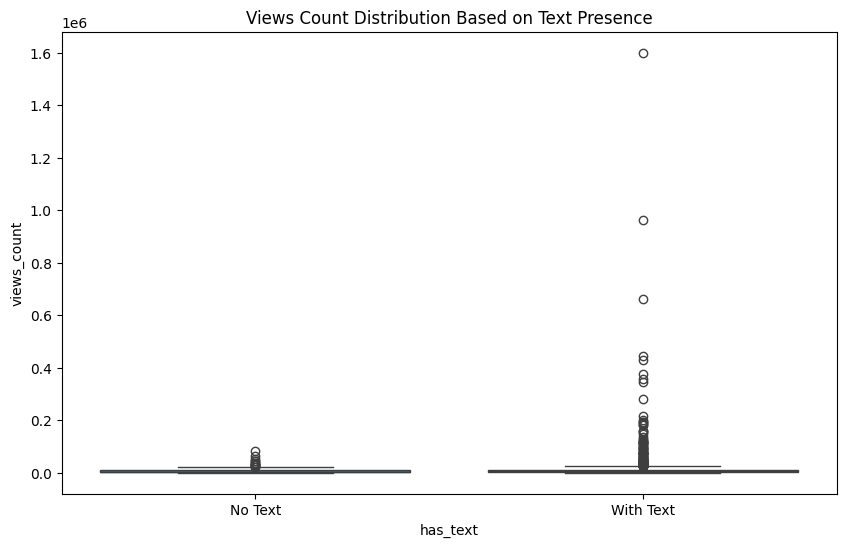

In [246]:
all_posts_it_tt_df['has_text'] = all_posts_it_tt_df['text_original'].notna().astype(int)

engagement_metrics = ['likes_count', 'shares_count', 'comments_count', 'views_count']

print("\nEngagement metrics comparison (with vs. without text):")
print(all_posts_it_tt_df.groupby('has_text')[engagement_metrics].mean())

plt.figure(figsize=(10, 6))
sns.boxplot(data=all_posts_it_tt_df, x='has_text', y='views_count')
plt.title('Views Count Distribution Based on Text Presence')
plt.xticks([0, 1], ['No Text', 'With Text'])
plt.show()

/tmp/ipykernel_54770/4178142430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_posts_pt_tt_df['has_text'] = all_posts_pt_tt_df['text_original'].notna().astype(int)
2025-01-26 20:33:29,441 | INFO | category.py:224 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-26 20:33:29,461 | INFO | category.py:224 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



Engagement metrics comparison (with vs. without text):
          likes_count  shares_count  comments_count   views_count
has_text                                                         
0           480.60000     78.925000      155.775000   6265.475000
1          3133.26087    828.630435     1110.391304  61125.608696


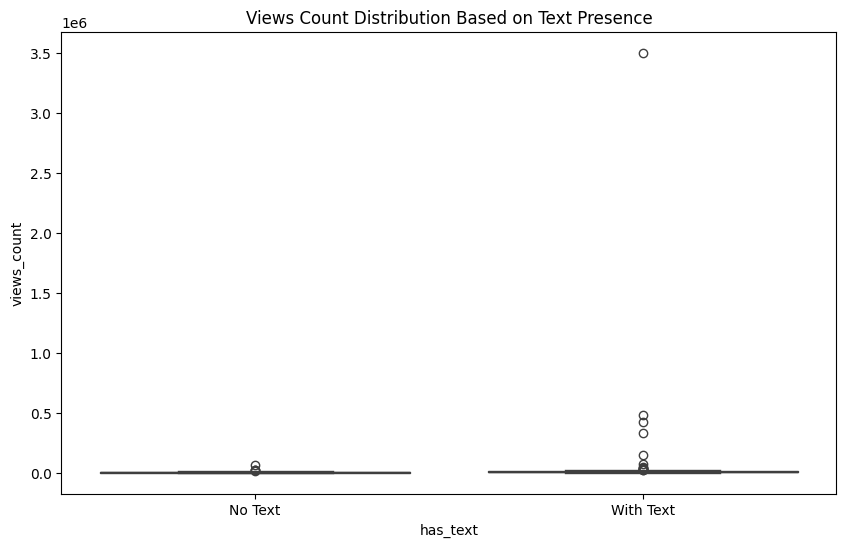

In [247]:
all_posts_pt_tt_df['has_text'] = all_posts_pt_tt_df['text_original'].notna().astype(int)

print("\nEngagement metrics comparison (with vs. without text):")
print(all_posts_pt_tt_df.groupby('has_text')[engagement_metrics].mean())

# Visualizing impact of text presence
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_posts_pt_tt_df, x='has_text', y='views_count')
plt.title('Views Count Distribution Based on Text Presence')
plt.xticks([0, 1], ['No Text', 'With Text'])
plt.show()

/tmp/ipykernel_54770/3460825888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_posts_pl_tt_df['has_text'] = all_posts_pl_tt_df['text_original'].notna().astype(int)
2025-01-26 20:33:30,029 | INFO | category.py:224 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-26 20:33:30,048 | INFO | category.py:224 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



Engagement metrics comparison (with vs. without text):
          likes_count  shares_count  comments_count   views_count
has_text                                                         
0          872.046358      8.768212      216.708609   7243.668874
1         1134.403165     20.683497      307.577242  11359.740015


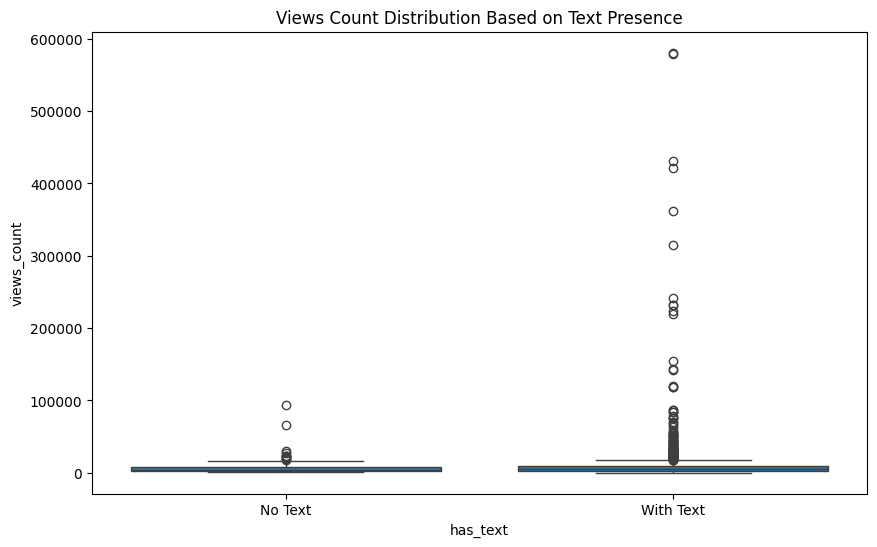

In [248]:
all_posts_pl_tt_df['has_text'] = all_posts_pl_tt_df['text_original'].notna().astype(int)

print("\nEngagement metrics comparison (with vs. without text):")
print(all_posts_pl_tt_df.groupby('has_text')[engagement_metrics].mean())

# Visualizing impact of text presence
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_posts_pl_tt_df, x='has_text', y='views_count')
plt.title('Views Count Distribution Based on Text Presence')
plt.xticks([0, 1], ['No Text', 'With Text'])
plt.show()

seems like it's better to post with text (description, hashtags etc.)

In [249]:
with_text_tt_df.columns

Index(['platform', 'account_id', 'id', 'created_time', 'text_original',
       'likes_count', 'shares_count', 'comments_count', 'views_count', 'hour',
       'date', 'day_of_week', 'weighted_engagement',
       'engagement_to_views_ratio', 'community_to_views_ratio', 'links',
       'emails', 'phone_numbers', 'tags', 'accounts', 'emojis', 'cleaned_text',
       'language'],
      dtype='object')

In [250]:
columns_to_check = ['links', 'emails', 'phone_numbers', 'tags', 'accounts', 'emojis']

# Count rows where each column has a non-empty list
non_empty_counts = {col: with_text_tt_df[
    with_text_tt_df[col].apply(
        lambda x: isinstance(x, list) and len(x) > 0)
    ].shape[0] for col in columns_to_check
}

print(non_empty_counts)

{'links': 2, 'emails': 0, 'phone_numbers': 264, 'tags': 2047, 'accounts': 5, 'emojis': 763}


In [251]:
from scipy.stats import ttest_ind

for col in ['tags', 'emojis', 'phone_numbers']:
    with_text_tt_df[col] = with_text_tt_df[col].apply(
        eval if isinstance(with_text_tt_df[col].iloc[0], str) else lambda x: x
    )

def test_presence_effect(df, column, target_cols):
    """
    Tests the impact of the presence of items in a given list column on target metrics.
    """
    df['has_' + column] = df[column].apply(lambda x: len(x) > 0)

    results = {}
    for target in target_cols:
        group_with = df[df['has_' + column]][target]
        group_without = df[~df['has_' + column]][target]
        
        t_stat, p_val = ttest_ind(group_with, group_without, equal_var=False)
        results[target] = {
            'mean_with': group_with.mean(),
            'mean_without': group_without.mean(),
            't_stat': t_stat,
            'p_val': p_val
        }
    
    return results

hypotheses = {
    "tags_boost": ('tags', ['views_count', 'engagement_to_views_ratio']),
    "emojis_boost": ('emojis', ['views_count', 'engagement_to_views_ratio']),
    "phones_drop": ('phone_numbers', ['views_count', 'engagement_to_views_ratio'])
}

hypothesis_results = {key: test_presence_effect(
    with_text_tt_df, col, metrics) for key, (col, metrics) in hypotheses.items()}

for hypothesis, results in hypothesis_results.items():
    print(f"\nHypothesis: {hypothesis.replace('_', ' ').capitalize()}")
    for metric, values in results.items():
        print(f"  {metric}:")
        print(f"    Mean with presence: {values['mean_with']:.2f}")
        print(f"    Mean without presence: {values['mean_without']:.2f}")
        print(f"    T-statistic: {values['t_stat']:.4f}, P-value: {values['p_val']:.4e}")

def find_popular_items(df, column, views_threshold=0.9):
    """
    Identifies the most popular items in a given list column among high-view posts.
    """
    high_view_threshold = df['views_count'].quantile(views_threshold)
    high_view_posts = df[df['views_count'] > high_view_threshold]

    all_items = [item for sublist in high_view_posts[column] for item in sublist]
    counter = Counter(all_items)
    return counter.most_common(10)

popular_tags = find_popular_items(with_text_tt_df, 'tags')
popular_emojis = find_popular_items(with_text_tt_df, 'emojis')

print("\nMost popular tags in high-view posts:", popular_tags)
print("Most popular emojis in high-view posts:", popular_emojis)



Hypothesis: Tags boost
  views_count:
    Mean with presence: 17017.61
    Mean without presence: 14225.27
    T-statistic: 0.5694, P-value: 5.6968e-01
  engagement_to_views_ratio:
    Mean with presence: 0.17
    Mean without presence: 0.15
    T-statistic: 2.9748, P-value: 3.3814e-03

Hypothesis: Emojis boost
  views_count:
    Mean with presence: 15881.16
    Mean without presence: 17354.20
    T-statistic: -0.4158, P-value: 6.7762e-01
  engagement_to_views_ratio:
    Mean with presence: 0.17
    Mean without presence: 0.17
    T-statistic: 1.4709, P-value: 1.4151e-01

Hypothesis: Phones drop
  views_count:
    Mean with presence: 16631.99
    Mean without presence: 16868.63
    T-statistic: -0.0491, P-value: 9.6086e-01
  engagement_to_views_ratio:
    Mean with presence: 0.19
    Mean without presence: 0.17
    T-statistic: 4.4321, P-value: 1.2493e-05

Most popular tags in high-view posts: [('#Jezus', 44), ('#modlitwa', 40), ('#Puglia', 40), ('#wiara', 32), ('#Piemonte', 30), ('#r

In [252]:
it_tt_df.columns

Index(['platform', 'account_id', 'id', 'created_time', 'text_original',
       'likes_count', 'shares_count', 'comments_count', 'views_count', 'hour',
       'date', 'day_of_week', 'weighted_engagement',
       'engagement_to_views_ratio', 'community_to_views_ratio', 'links',
       'emails', 'phone_numbers', 'tags', 'accounts', 'emojis', 'cleaned_text',
       'language'],
      dtype='object')

In [253]:
all_posts_it_tt_df.groupby(
    ['account_id', 'day_of_week']).size().reset_index(
        name='post_count').sort_values(by="day_of_week").head(10)

/tmp/ipykernel_54770/2147675524.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_posts_it_tt_df.groupby(


,account_id,day_of_week,post_count
0,6793090586712720389,Monday,22
21,7301606688049054752,Monday,56
28,7304639704442504193,Monday,0
56,7328843375271167009,Monday,12
35,7304673650114987041,Monday,4
7,7300339497852568609,Monday,0
49,7325852473468879905,Monday,11
14,7300624739352462368,Monday,1
63,7373402237239870496,Monday,20
42,7306616797560898592,Monday,4


In [254]:
all_posts_pl_tt_df.groupby(
    ['account_id', 'day_of_week']).size().reset_index(
        name='post_count').sort_values(by="day_of_week").head(10)

/tmp/ipykernel_54770/2688585589.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_posts_pl_tt_df.groupby(


,account_id,day_of_week,post_count
0,7305129826343666720,Monday,4
21,7306055620665820166,Monday,28
28,7306849648332243969,Monday,24
56,7372621278249337889,Monday,1
35,7308760731372291104,Monday,54
7,7305768185533236256,Monday,8
49,7327430517305066529,Monday,35
14,7305775548541256737,Monday,29
63,7381198827104076832,Monday,4
42,7310612150594372641,Monday,19


disbalance can be seen above in terms of how much posts account with some id was done on some day of the week

In [255]:
all_posts_pt_tt_df.groupby(
    ['account_id', 'day_of_week']).size().reset_index(
        name='post_count').sort_values(by="day_of_week").head(10)

/tmp/ipykernel_54770/1349830948.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_posts_pt_tt_df.groupby(


,account_id,day_of_week,post_count
0,7317060523728045062,Monday,23
1,7317060523728045062,Tuesday,16
2,7317060523728045062,Wednesday,19
3,7317060523728045062,Thursday,19
4,7317060523728045062,Friday,18
5,7317060523728045062,Saturday,19
6,7317060523728045062,Sunday,18


ANOVA for portugese df because it has only one account, balanced posts in terms of number of posts per day of week

In [256]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

anova_result = stats.f_oneway(*[all_posts_pt_tt_df[all_posts_pt_tt_df['day_of_week'] == day]['views_count'] for day in all_posts_pt_tt_df['day_of_week'].unique()])
print("ANOVA p-value:", anova_result.pvalue)

if anova_result.pvalue < 0.05:
    print("Significant trend found based on day_of_week of posting!")
else:
    print("No significant trend detected.")

# Post-hoc analysis to see which days differ
posthoc = pairwise_tukeyhsd(all_posts_pt_tt_df['views_count'], all_posts_pt_tt_df['day_of_week'])
print(posthoc)

ANOVA p-value: 0.6939801852959493
No significant trend detected.
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
 group1    group2    meandiff   p-adj     lower        upper    reject
----------------------------------------------------------------------
  Friday    Monday  126691.4565 0.8555 -167686.5386 421069.4517  False
  Friday  Saturday  -23845.7632    1.0 -331527.2705 283835.7441  False
  Friday    Sunday  -25063.1667    1.0 -336874.8119 286748.4785  False
  Friday  Thursday   10843.4474    1.0 -296838.0599 318524.9547  False
  Friday   Tuesday      7552.25    1.0 -313855.8371 328960.3371  False
  Friday Wednesday  -22949.7632    1.0 -330631.2705 284731.7441  False
  Monday  Saturday -150537.2197 0.7105 -440536.8953  139462.456  False
  Monday    Sunday -151754.6232 0.7171 -446132.6184  142623.372  False
  Monday  Thursday -115848.0092  0.894 -405847.6848 174151.6665  False
  Monday   Tuesday -119139.2065 0.9032 -423663.5248 185385.1117  False
  Monday Wed

 using a non-parametric test designed for repeated measures, such as the Friedman test

In [257]:
from scipy.stats import friedmanchisquare

pivot_it_tt_df = all_posts_it_tt_df.pivot_table(
    index='account_id', columns='day_of_week', values='views_count', aggfunc='median'
)

pivot_it_tt_df = pivot_it_tt_df.fillna(0) 
data = [pivot_it_tt_df[col].values for col in pivot_it_tt_df.columns]

statistic, p_value = friedmanchisquare(*data)

print("Friedman test statistic:", statistic)
print("Friedman test p-value:", p_value)


alpha = 0.05  
if p_value < alpha:
    print("Significant differences found between some day_of_weeks!")
else:
    print("No significant differences between day_of_weeks.")

Friedman test statistic: 11.370873786407765
Friedman test p-value: 0.07756850971711922
No significant differences between day_of_weeks.


/tmp/ipykernel_54770/472844573.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_it_tt_df = all_posts_it_tt_df.pivot_table(


same no trends for other metrics like: 'weighted_engagement',
       'engagement_to_views_ratio', 'community_to_views_ratio',
for all languages (italian, pl_tt_df (polish))

In [258]:
all_posts_it_tt_df.groupby(
    ['account_id', 'hour']).size().reset_index(
        name='post_count').sort_values(by="hour").head(24)

,account_id,hour,post_count
87,7373402237239870496,3,1
0,6793090586712720389,4,29
20,7301606688049054752,4,4
88,7373402237239870496,4,8
73,7328843375271167009,4,1
39,7304673650114987041,4,1
48,7306616797560898592,4,3
59,7325852473468879905,4,6
38,7304639704442504193,5,1
21,7301606688049054752,5,18


In [259]:
all_posts_pl_tt_df.groupby(
    ['account_id', 'hour']).size().reset_index(
        name='post_count').sort_values(by="hour").head(24)

,account_id,hour,post_count
92,7372621278249337889,3,2
38,7306849648332243969,3,2
26,7306055620665820166,3,4
98,7381198827104076832,3,1
65,7310612150594372641,4,28
39,7306849648332243969,4,47
15,7305775548541256737,4,3
0,7305129826343666720,4,7
27,7306055620665820166,4,64
50,7308760731372291104,4,29


In [260]:
all_posts_pt_tt_df.groupby(
    ['account_id', 'hour']).size().reset_index(
        name='post_count').sort_values(by="hour").head(24)

,account_id,hour,post_count
0,7317060523728045062,0,5
1,7317060523728045062,1,1
2,7317060523728045062,12,7
3,7317060523728045062,13,37
4,7317060523728045062,14,11
5,7317060523728045062,15,3
6,7317060523728045062,18,3
7,7317060523728045062,19,5
8,7317060523728045062,20,30
9,7317060523728045062,21,20


disbalance can be seen above in terms of how much posts account with some id was done on some hour

In [261]:
import scikit_posthocs as sp

pivot_pl_tt_df = all_posts_pl_tt_df.pivot_table(
    index='account_id', columns='hour', values='views_count', aggfunc='median'
)

pivot_pl_tt_df = pivot_pl_tt_df.fillna(0)
data = [pivot_pl_tt_df[col].values for col in pivot_pl_tt_df.columns]

statistic, p_value = friedmanchisquare(*data)

print("Friedman test statistic:", statistic)
print("Friedman test p-value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print("Significant differences found between some hours!")
    posthoc_results = sp.posthoc_nemenyi_friedman(pivot_pl_tt_df.values)
    posthoc_df = pd.DataFrame(posthoc_results, index=pivot_pl_tt_df.columns, columns=pivot_pl_tt_df.columns)
    print(posthoc_df)
    
else:
    print("No significant differences between hours.")



Friedman test statistic: 54.62259559675552
Friedman test p-value: 7.876987510535035e-06
Significant differences found between some hours!
hour        3         4         5         6         7         8         9   \
hour                                                                         
3     1.000000  1.000000  0.893410  0.552612  0.092615  0.992845  1.000000   
4     1.000000  1.000000  0.959358  0.711222  0.164326  0.998847  1.000000   
5     0.893410  0.959358  1.000000  1.000000  0.997459  1.000000  0.998270   
6     0.552612  0.711222  1.000000  1.000000  0.999997  0.999941  0.938182   
7     0.092615  0.164326  0.997459  0.999997  1.000000  0.938182  0.424441   
8     0.992845  0.998847  1.000000  0.999941  0.938182  1.000000  0.999997   
9     1.000000  1.000000  0.998270  0.938182  0.424441  0.999997  1.000000   
10    0.998847  0.999896  1.000000  0.999249  0.854261  1.000000  1.000000   
11    0.768545  0.884326  1.000000  1.000000  0.999770  1.000000  0.988692   
12  

17 and 7, 14

In [262]:
filtered_df = all_posts_pl_tt_df[all_posts_pl_tt_df['hour'].isin([7, 14, 17])]

grouped = filtered_df.groupby(['hour'])

aggregated = grouped.agg({
    'weighted_engagement': 'median',
    'engagement_to_views_ratio': 'median',
    'community_to_views_ratio': 'median',
    'views_count': 'median'
}).reset_index()

aggregated.head()

,hour,weighted_engagement,engagement_to_views_ratio,community_to_views_ratio,views_count
0,7,5780.0,0.223636,0.052314,12100.0
1,14,1720.1,0.165196,0.027931,4297.0
2,17,2067.3,0.176063,0.031265,5078.5


I should be grouping by ['hour', 'account_id'] but it's hard to interpret results then, 
conclusionsL better to post at 7 than at 17, worse at 14 than 17 

In [263]:
pivot_it_tt_df = all_posts_it_tt_df.pivot_table(
    index='account_id', columns='hour', values='views_count', aggfunc='median'
)

pivot_it_tt_df = pivot_it_tt_df.fillna(0)
data = [pivot_it_tt_df[col].values for col in pivot_it_tt_df.columns]

statistic, p_value = friedmanchisquare(*data)

print("Friedman test statistic:", statistic)
print("Friedman test p-value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print("Significant differences found between some hours!")
    posthoc_results = sp.posthoc_nemenyi_friedman(pivot_it_tt_df.values)
    posthoc_df = pd.DataFrame(posthoc_results, index=pivot_it_tt_df.columns, columns=pivot_it_tt_df.columns)
    print(posthoc_df)
    
else:
    print("No significant differences between hours.")

Friedman test statistic: 57.59110312289365
Friedman test p-value: 4.984141524371581e-06
Significant differences found between some hours!
hour        3         4         5         6         7         8         9   \
hour                                                                         
3     1.000000  0.360388  0.909461  1.000000  1.000000  0.965566  0.333299   
4     0.360388  1.000000  0.999999  0.735030  0.834980  0.999964  1.000000   
5     0.909461  0.999999  1.000000  0.995474  0.998939  1.000000  0.999997   
6     1.000000  0.735030  0.995474  1.000000  1.000000  0.999297  0.706828   
7     1.000000  0.834980  0.998939  1.000000  1.000000  0.999893  0.812186   
8     0.965566  0.999964  1.000000  0.999297  0.999893  1.000000  0.999937   
9     0.333299  1.000000  0.999997  0.706828  0.812186  0.999937  1.000000   
10    0.432240  1.000000  1.000000  0.800205  0.884736  0.999992  1.000000   
11    0.735030  1.000000  1.000000  0.961604  0.985267  1.000000  1.000000   
12  

as you can see i can't define exact pairwise differences even considering that friedmanchisquare() returned p-value < 0.05. 

In [264]:
pivot_pt_tt_df = all_posts_pt_tt_df.pivot_table(
    index='account_id', columns='hour', values='views_count', aggfunc='mean'
)

pivot_pt_tt_df = pivot_pt_tt_df.fillna(0)
data = [pivot_pt_tt_df[col].values for col in pivot_pt_tt_df.columns]

statistic, p_value = friedmanchisquare(*data)

print("Friedman test statistic:", statistic)
print("Friedman test p-value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print("Significant differences found between some hours!")
    posthoc_results = sp.posthoc_nemenyi_friedman(pivot_pt_tt_df.values)
    posthoc_df = pd.DataFrame(posthoc_results, index=pivot_pt_tt_df.columns, columns=pivot_pt_tt_df.columns)
    print(posthoc_df)
    
else:
    print("No significant differences between hours.")

Friedman test statistic: 11.0
Friedman test p-value: 0.4432632784264655
No significant differences between hours.


as you can see analysis was only for tiktok because i was focusing on understanding general process more than doing a little for each platform,
i think I'm missing some type of time-series analysis knowledge to catch what actually the task is,
i didn't do any complicated sentiment analysis here,
also i didn't check special holidays for target countries.